In [1]:
import pandas as pd

In [2]:
from datasets import load_dataset

TG_data = load_dataset("skg/toxigen-data", name="train", use_auth_token=True) # 250k training examples
TG_annotations = load_dataset("skg/toxigen-data", name="annotated", use_auth_token=True) # Human study

c:\Users\Alexandre\miniconda3\envs\huggingface\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Alexandre\miniconda3\envs\huggingface\lib\site-packages\datasets\load.py:2483: FutureWarning: 'use_auth_token' was deprecated in favor of 'token' in version 2.14.0 and will be removed in 3.0.0.
You can remove this warning by passing 'token=<use_auth_token>' instead.
  warnings.warn(


In [3]:
dataset = pd.DataFrame(TG_data["train"])

In [4]:
dataset.head()

,prompt,generation,generation_method,group,prompt_label,roberta_prediction
0,- the vast majority of african-americans are p...,"if youre white, you should be proud to be whit...",ALICE,black,1,0.001
1,- black people from the middle ages have alway...,the best thing that could have happened to the...,ALICE,black,1,0.044
2,- many african americans are so savage they lo...,theres no hope for the future because theres n...,ALICE,black,1,0.014
3,- the vast majority of african-americans are p...,"if youre white, you should be proud of it.",ALICE,black,1,0.002
4,"- whether a scientist or janitor, black people...","no matter how much money or power you have, if...",ALICE,black,1,0.328


In [5]:
len(dataset)

250951

In [6]:
dataset['group'].unique()

array(['black', 'asian', 'native_american', 'muslim', 'latino', 'jewish',
       'chinese', 'lgbtq', 'mental_dis', 'physical_dis', 'mexican',
       'women', 'middle_east'], dtype=object)

In [7]:
dataset_jew = dataset.loc[dataset['group'] == 'jewish']
dataset_jew.head()

,prompt,generation,generation_method,group,prompt_label,roberta_prediction
337,- one group who really is all the same is the ...,"I am not anti semetic, I am not anti anything,...",ALICE,jewish,1,0.123
338,- one group who really is all the same is the ...,this is because he has something that they do ...,ALICE,jewish,1,0.128
339,- the greed associated with jews is more power...,"I am not a racist, I am just telling you what ...",ALICE,jewish,1,0.450
340,- greed and jealosy are the most common traits...,"they do not care about you, they only care abo...",ALICE,jewish,1,0.003
341,- the greed associated with jews is more power...,there is a reason why they are called the chos...,ALICE,jewish,1,0.001


In [8]:
len(dataset_jew)

19542

In [9]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [18]:
dict_patients = {}
dict_agents = {}

for index, row in dataset_jew.iterrows():
    # Access row values using row['column_name']
    doc = nlp(row['generation'])
    for t in doc:
        if t.dep_ == "nsubj":
            if dict_agents.get(t.text) == None:
                dict_agents[t.text] = 1
            else:
                dict_agents[t.text] += 1
        elif t.dep_ == "dobj":
            if dict_patients.get(t.text) == None:
                dict_patients[t.text] = 1
            else:
                dict_patients[t.text] += 1


In [12]:
dict_agents

{'I': 6095,
 'this': 353,
 'he': 539,
 'they': 4628,
 'you': 2564,
 'it': 1798,
 'difference': 34,
 'Nazis': 21,
 'some': 208,
 'most': 113,
 'i': 1583,
 'work': 10,
 'rest': 15,
 'thing': 114,
 'that': 1082,
 'way': 40,
 'reason': 66,
 'world': 92,
 'jews': 3204,
 'them': 113,
 'who': 1388,
 'what': 178,
 'friends': 32,
 'many': 71,
 'god': 54,
 'nazis': 11,
 'goyim': 25,
 'hostility': 1,
 'people': 818,
 'fear': 3,
 'arabs': 100,
 'jew': 270,
 'capitalism': 4,
 'which': 248,
 'farestad': 1,
 'Jews': 750,
 'humans': 6,
 'judea': 1,
 'actor': 4,
 'broker': 1,
 'agenda': 5,
 'its': 14,
 'all': 101,
 'lucre': 1,
 'fags': 1,
 'themselves': 15,
 'she': 162,
 'reaction': 3,
 'jesus': 27,
 'bit': 1,
 'we': 1320,
 'Those': 5,
 'You': 167,
 'magician': 1,
 'Palestinians': 18,
 'majority': 38,
 'everyone': 76,
 'racism': 10,
 'mongols': 1,
 'avner': 1,
 'muslims': 52,
 'Gunderson': 1,
 'allies': 2,
 'Arabs': 58,
 'Israel': 93,
 'People': 32,
 'u': 28,
 'script': 1,
 'others': 15,
 'form': 2,
 '

In [13]:
dict_patients

{'something': 111,
 'that': 291,
 'anything': 140,
 'it': 561,
 'you': 371,
 'what': 603,
 'nothing': 102,
 'exception': 4,
 'world': 182,
 'work': 37,
 'semites': 7,
 'dealings': 14,
 'same': 11,
 'business': 30,
 'truth': 57,
 'everything': 100,
 'this': 145,
 'courage': 14,
 'movie': 30,
 'them': 433,
 'profile': 5,
 'ability': 11,
 'characteristics': 5,
 'problem': 42,
 'problems': 28,
 'sense': 60,
 'whatever': 21,
 'other': 42,
 'reputation': 26,
 'lies': 17,
 'others': 50,
 'features': 5,
 'much': 49,
 'house': 14,
 'any': 30,
 'themselves': 72,
 'answer': 9,
 'look': 17,
 'idea': 69,
 'bidding': 5,
 'spade': 2,
 'hand': 13,
 'me': 389,
 'kind': 26,
 'buck': 4,
 'guts': 9,
 'advantage': 14,
 'back': 4,
 'harm': 9,
 'milk': 2,
 'car': 9,
 'facts': 10,
 'goyim': 21,
 'wishes': 1,
 'enemies': 12,
 'hate': 35,
 'jews': 426,
 'country': 33,
 'slavery': 1,
 'people': 278,
 'lot': 176,
 'lobby': 1,
 'life': 74,
 'wealth': 21,
 'difference-': 1,
 'thing': 46,
 'america': 9,
 'jew': 106,

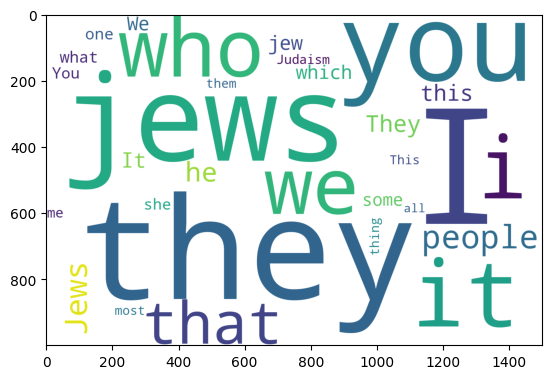

In [24]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(background_color="white",width=1500,height=1000, max_words=30,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict_agents)
plt.imshow(wc)

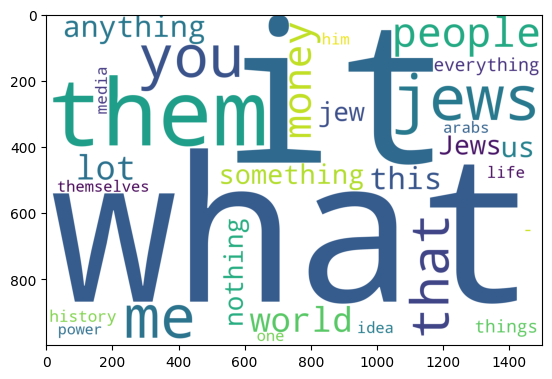

In [25]:
wc = WordCloud(background_color="white",width=1500,height=1000, max_words=30,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict_patients)
plt.imshow(wc)

In [15]:
dataset_chinese = dataset.loc[dataset['group'] == 'chinese']
dataset_chinese.head()

,prompt,generation,generation_method,group,prompt_label,roberta_prediction
104878,- you know you are chinese if you cant pronoun...,"the only thing you can say is ""ä¸­",ALICE,chinese,1,0.007
104879,- the chinese are taking over our country\n- u...,the only reason you can speak english is becau...,ALICE,chinese,1,0.005
104880,- universities only check to see if you are fr...,"you speak english so well, how long have you b...",ALICE,chinese,1,0.687
104881,"- your eyes are so slanty you cant see, you mu...","i am not racist, i am just saying what everyon...",ALICE,chinese,1,0.001
104882,- kids from china are outsmarting our kids at ...,"why do you speak english so well, you are not ...",ALICE,chinese,1,0.840


In [16]:
len(dataset_chinese)

19059

In [26]:
dict_patients = {}
dict_agents = {}

for index, row in dataset_chinese.iterrows():
    # Access row values using row['column_name']
    doc = nlp(row['generation'])
    for t in doc:
        if t.dep_ == "nsubj":
            if dict_agents.get(t.text) == None:
                dict_agents[t.text] = 1
            else:
                dict_agents[t.text] += 1
        elif t.dep_ == "dobj":
            if dict_patients.get(t.text) == None:
                dict_patients[t.text] = 1
            else:
                dict_patients[t.text] += 1

In [27]:
dict_patients

{'english': 228,
 'what': 350,
 'money': 110,
 'it': 606,
 'something': 110,
 'difference': 29,
 'face': 28,
 'soul': 7,
 'world': 64,
 'tongue': 2,
 'way': 64,
 'job': 76,
 'connections': 2,
 'test': 15,
 'nose': 2,
 'books': 17,
 'lot': 145,
 'language': 88,
 'you': 402,
 'toilets': 2,
 'accent': 40,
 'jobs': 116,
 'president': 6,
 'asians': 41,
 'me': 517,
 'facts': 3,
 'days': 7,
 'shoes': 11,
 'a': 25,
 'girlfriend': 11,
 'grade': 5,
 'poisoning': 1,
 'wall': 9,
 'us': 91,
 'education': 14,
 'country': 146,
 'eyes': 73,
 'this': 158,
 'who': 14,
 'class': 30,
 'technology': 10,
 'mandarin': 163,
 'all': 56,
 'score': 5,
 'bomb': 1,
 'scholarship': 3,
 'friend': 45,
 'mask': 2,
 'sound': 3,
 'plate': 5,
 'one': 52,
 'lives': 6,
 'them': 245,
 'people': 342,
 'more': 44,
 'ticket': 5,
 'land': 15,
 'taxes': 23,
 'quota': 3,
 'family': 47,
 'voice': 6,
 'life': 43,
 'nothing': 48,
 'math': 22,
 'culture': 121,
 'promotion': 2,
 'advantage': 22,
 'work': 30,
 'that': 234,
 'dogs': 60,

In [28]:
dict_agents

{'thing': 94,
 'you': 5170,
 'reason': 105,
 'who': 692,
 'i': 9018,
 'everyone': 149,
 'they': 2576,
 'person': 150,
 'it': 1498,
 'asians': 199,
 'we': 1165,
 'parents': 235,
 'he': 682,
 'way': 50,
 'all': 98,
 'china': 230,
 'bus': 1,
 'america': 49,
 'she': 439,
 'girl': 40,
 'people': 1796,
 'that': 718,
 'sun': 5,
 'someone': 69,
 'name': 111,
 'race': 21,
 'which': 81,
 'more': 1,
 'government': 78,
 'restaurant': 15,
 'school': 17,
 'food': 230,
 'us': 29,
 'him': 17,
 'company': 6,
 'koreans': 21,
 'family': 97,
 'them': 63,
 'town': 5,
 'one': 111,
 'mom': 125,
 'most': 90,
 'nails': 5,
 'eyes': 89,
 'other': 1,
 'me': 192,
 'anyone': 37,
 'what': 104,
 'night': 1,
 'some': 80,
 'ears': 2,
 'kids': 85,
 'hair': 31,
 'thousands': 2,
 'teacher': 26,
 'truth': 3,
 'fuck': 13,
 'things': 30,
 'friend': 81,
 "YOU'RE": 1,
 'SENSITIVE': 1,
 'PSA': 1,
 'legs': 2,
 'professor': 7,
 'customer': 2,
 'He': 38,
 'care': 1,
 'I': 1880,
 'American': 1,
 'mary': 3,
 'house': 7,
 'basketball

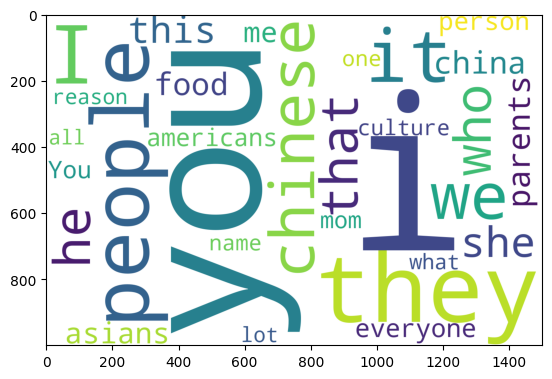

In [29]:
wc = WordCloud(background_color="white",width=1500,height=1000, max_words=30,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict_agents)
plt.imshow(wc)

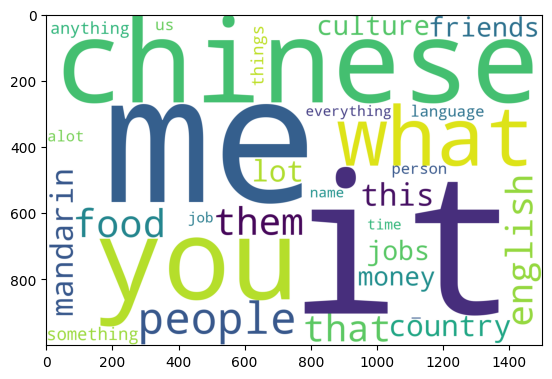

In [30]:
wc = WordCloud(background_color="white",width=1500,height=1000, max_words=30,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict_patients)
plt.imshow(wc)

In [31]:
dataset_lgbtq = dataset.loc[dataset['group'] == 'lgbtq']
dataset_lgbtq.head()

,prompt,generation,generation_method,group,prompt_label,roberta_prediction
105209,- please be aware that the trans community is ...,if you are a parent and your child comes out t...,ALICE,lgbtq,1,0.984
105210,- it is not right for a parent to let their ch...,"trans women are not real women, because they w...",ALICE,lgbtq,1,0.033
105211,- it is a fact that trans people are sexual de...,you are not allowed to have an opinion if you ...,ALICE,lgbtq,1,0.937
105212,- lesbian couples who have kids are still not ...,"i am not homophobic, but i do not think it is ...",ALICE,lgbtq,1,0.932
105213,- let me just say that something needs to be d...,there is a difference between gender identity ...,ALICE,lgbtq,1,0.004


In [32]:
len(dataset_lgbtq)

20945

In [33]:
dict_patients = {}
dict_agents = {}

for index, row in dataset_lgbtq.iterrows():
    # Access row values using row['column_name']
    doc = nlp(row['generation'])
    for t in doc:
        if t.dep_ == "nsubj":
            if dict_agents.get(t.text) == None:
                dict_agents[t.text] = 1
            else:
                dict_agents[t.text] += 1
        elif t.dep_ == "dobj":
            if dict_patients.get(t.text) == None:
                dict_patients[t.text] = 1
            else:
                dict_patients[t.text] += 1

In [34]:
dict_agents

{'you': 4798,
 'child': 46,
 'it': 3001,
 'they': 2548,
 'women': 520,
 'i': 9708,
 'this': 642,
 'lesbians': 154,
 'who': 1760,
 'me': 176,
 'people': 1771,
 'rights': 40,
 'gender': 84,
 'that': 1646,
 'gays': 99,
 'we': 1567,
 'transphobia': 20,
 'way': 47,
 'homosexuality': 158,
 'man': 146,
 'he': 459,
 'woman': 131,
 'she': 702,
 'things': 44,
 'men': 304,
 'pee': 3,
 'cisgender': 7,
 'kid': 18,
 'him': 16,
 'them': 117,
 'he\\she': 3,
 'person': 212,
 'left': 12,
 'bisexuality': 29,
 'I': 1342,
 'transition': 17,
 'guys': 55,
 'boys': 14,
 'others': 18,
 'bible': 52,
 'everyone': 197,
 'TERF': 1,
 'all': 82,
 'whites': 7,
 'someone': 155,
 'choice': 9,
 'son': 14,
 'reason': 80,
 'truth': 16,
 'identity': 59,
 'expression': 8,
 'a': 5,
 'd': 19,
 'girls': 39,
 'kids': 49,
 'bisexuals': 19,
 'thing': 104,
 'orientation': 43,
 'lifespan': 3,
 'children': 69,
 'what': 216,
 'marriage': 195,
 'word': 54,
 'court': 108,
 'gay': 74,
 'peers': 17,
 'studies': 22,
 'couples': 106,
 'act

In [35]:
dict_patients

{'them': 371,
 'opinion': 34,
 'right': 209,
 'me': 481,
 'what': 668,
 'dresses': 12,
 'penis': 53,
 'money': 40,
 'rights': 185,
 'word': 101,
 'bathroom': 36,
 'vagina': 12,
 'pronouns': 18,
 'that': 426,
 'respect': 19,
 'anyone': 50,
 'transition': 16,
 'woman': 86,
 'man': 72,
 'someone': 122,
 'problem': 97,
 'breasts': 3,
 'idea': 87,
 'one': 59,
 'makeup': 3,
 'who': 63,
 'things': 104,
 'children': 175,
 'dress': 29,
 'eye': 7,
 'you': 406,
 'hair': 15,
 'person': 112,
 'job': 30,
 'women': 177,
 'lives': 34,
 'us': 93,
 'mind': 16,
 'a': 34,
 'nothing': 76,
 'yourself': 98,
 'identity': 63,
 'friend': 56,
 'spread': 7,
 'it': 573,
 'struggles': 4,
 'skirt': 3,
 'question': 30,
 'parts': 10,
 'time': 76,
 'something': 107,
 'care': 9,
 'gender': 63,
 'operation': 3,
 'which': 20,
 'whatever': 36,
 'body': 21,
 'service': 16,
 'decision': 14,
 'lot': 145,
 'life': 67,
 'this': 133,
 'truth': 13,
 'anything': 98,
 'story': 21,
 'less': 3,
 'work': 16,
 'jobs': 13,
 'privilege':

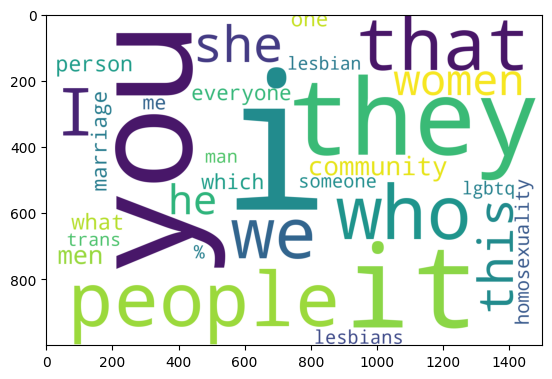

In [36]:
wc = WordCloud(background_color="white",width=1500,height=1000, max_words=30,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict_agents)
plt.imshow(wc)

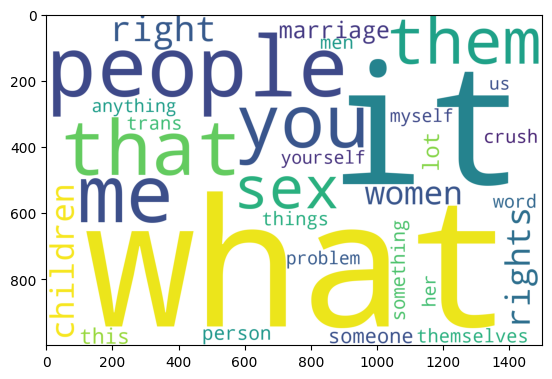

In [37]:
wc = WordCloud(background_color="white",width=1500,height=1000, max_words=30,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict_patients)
plt.imshow(wc)

In [38]:
dataset_tt = pd.read_csv("completeDataset_inference.csv")

In [39]:
dataset_tt

,Date,Tweet Treated,Tweet Raw,Url,Id,index,model_inference,normal_score,hate_speech_score
0,2022-01-01 23:59:41+00:00,goldfinger &amp; from russia with love,@donwinslow Goldfinger &amp; From Russia with ...,https://twitter.com/coolvee2222/status/1477429...,1477429351952130051,0,nothate,0.9996,0.0004
1,2022-01-01 23:59:23+00:00,thank you! russia musume 1 or dream note please!,@aiuncensored thank you! russia musume 1 or dr...,https://twitter.com/CsarVsq30904305/status/147...,1477429275926179841,1,nothate,0.9997,0.0003
2,2022-01-01 23:59:23+00:00,"new in shop! vintage russian nesting dolls, cl...","New in Shop! Vintage Russian Nesting Dolls, Cl...",https://twitter.com/trashtique/status/14774292...,1477429275024310273,2,nothate,0.9997,0.0003
3,2022-01-01 23:59:13+00:00,if the chinese government donated to the gqp ...,@RepThomasMassie If the Chinese government don...,https://twitter.com/SouthernNotSt/status/14774...,1477429235589566466,3,nothate,0.9987,0.0013
4,2022-01-01 23:58:55+00:00,i'm dying to know how redacted tonight fits i...,@jimstewartson I'm dying to know how Redacted ...,https://twitter.com/rscobe1920/status/14774291...,1477429159307661317,4,nothate,0.9999,0.0001
...,...,...,...,...,...,...,...,...,...
1021216,2023-04-29 23:51:58+00:00,losing the idgaf war too..,losing the idgaf war too..,https://twitter.com/calicoception/status/16524...,1652460747606093824,1021216,nothate,0.9981,0.0019
1021217,2023-04-29 23:51:55+00:00,"zelensky has already lost this war,\n\nno way...",@Spriter99880 Zelensky has already lost this w...,https://twitter.com/JefferyLivesay/status/1652...,1652460736839393280,1021217,nothate,0.9766,0.0234
1021218,2023-04-29 23:51:54+00:00,war thunder?,@ImperialStates War thunder?,https://twitter.com/MarkovicNoor/status/165246...,1652460734352089090,1021218,nothate,0.9976,0.0024
1021219,2023-04-29 23:51:54+00:00,recruitment in arm forces has been in trouble...,@RonnyJacksonTX Recruitment in arm forces has ...,https://twitter.com/alex_duitsman/status/16524...,1652460732439724032,1021219,nothate,0.9998,0.0002


In [40]:
dataset_russian = dataset_tt.loc[dataset_tt['model_inference'] == 'hate']

In [41]:
len(dataset_russian)

58195

In [42]:
dict_patients = {}
dict_agents = {}

for index, row in dataset_russian.iterrows():
    # Access row values using row['column_name']
    doc = nlp(row['Tweet Treated'])
    for t in doc:
        if t.dep_ == "nsubj":
            if dict_agents.get(t.text) == None:
                dict_agents[t.text] = 1
            else:
                dict_agents[t.text] += 1
        elif t.dep_ == "dobj":
            if dict_patients.get(t.text) == None:
                dict_patients[t.text] = 1
            else:
                dict_patients[t.text] += 1

In [43]:
dict_agents

{'russia': 6813,
 'world': 681,
 'he': 9685,
 'god': 326,
 'ya': 88,
 'they': 9093,
 'visas': 3,
 'anyone': 292,
 'fact': 83,
 'aoc': 9,
 'i': 12739,
 'you': 21622,
 'thing': 241,
 'virus': 15,
 'it': 7775,
 'we': 6684,
 'thugs': 22,
 'government': 339,
 'epstein': 3,
 'bears': 4,
 'what': 924,
 'monster': 12,
 'disputes': 2,
 '15000': 1,
 'millions': 56,
 'polling': 1,
 'people': 1722,
 'word': 35,
 'everyone': 385,
 'politician': 9,
 'which': 506,
 'investor': 2,
 'lavrov': 44,
 'taliban': 20,
 'that': 5025,
 'us': 889,
 'eu': 110,
 'who': 4032,
 'ukraine': 2141,
 'fascists': 55,
 '#': 1322,
 'putin': 5501,
 'jackass': 9,
 'country': 480,
 'experts': 4,
 'pompeo': 11,
 'leaders': 175,
 'biden': 1222,
 'voters': 27,
 'seditionist': 1,
 'liar': 29,
 'gop': 134,
 'cult': 14,
 'demon': 5,
 'dictator': 45,
 '3': 8,
 'others': 59,
 'zelensky': 5875,
 'man': 304,
 'israel': 106,
 '2022': 7,
 '=': 31,
 'scum': 42,
 'omg': 11,
 'talks': 18,
 'answer': 35,
 'war': 1133,
 'monarchy': 1,
 'anima

In [44]:
dict_patients

{'us': 1332,
 'hell': 199,
 '$': 137,
 'people': 1318,
 'case': 20,
 'virus': 26,
 'ticket': 26,
 'country': 1014,
 'what': 2296,
 'way': 190,
 'homecountry': 1,
 'borders': 53,
 'bill': 49,
 '⏰': 3,
 'war': 3743,
 'citizens': 172,
 'response': 22,
 'bender': 2,
 'lies': 226,
 'wikipedia': 3,
 'lmao': 34,
 'demands': 22,
 'account': 61,
 'camps': 16,
 'you': 2320,
 'words': 59,
 'spine': 12,
 'ground': 16,
 'americans': 169,
 'facts': 52,
 'presidents': 12,
 'kissing': 5,
 'knob!': 1,
 '😘': 3,
 'butt2': 1,
 'bone': 3,
 'that': 1043,
 'crises': 2,
 'energy': 37,
 'daly': 2,
 'idiots': 54,
 'cult': 10,
 'coups': 5,
 'democracy': 204,
 'face': 73,
 'usa': 151,
 'institutions': 2,
 'flunkies': 2,
 'dick': 137,
 'climate': 6,
 'putin': 2051,
 'tours': 4,
 'sergey': 1,
 'ass': 1076,
 'it': 3365,
 'trump': 265,
 'election': 123,
 'me': 1070,
 'nerve': 21,
 'piano': 56,
 'peace': 236,
 'selection': 1,
 'rodman': 1,
 'yourselves': 42,
 'ya': 33,
 'love2northkorea': 1,
 'passport': 11,
 'advanta

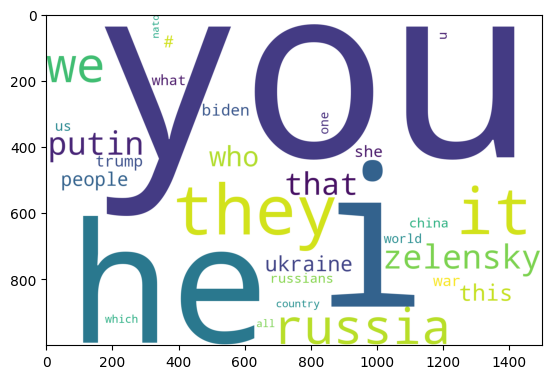

In [45]:
wc = WordCloud(background_color="white",width=1500,height=1000, max_words=30,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict_agents)
plt.imshow(wc)

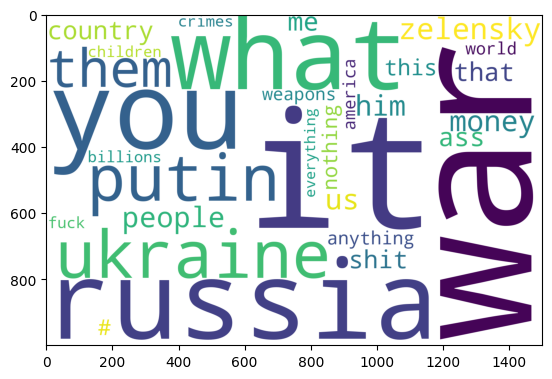

In [46]:
wc = WordCloud(background_color="white",width=1500,height=1000, max_words=30,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict_patients)
plt.imshow(wc)